In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

import matplotlib.pyplot as plt
import os

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import tensorflow as tf
# os.environ["CUDA_VISIBLE_DEVICES"] = ""
# from keras.backend.tensorflow_backend import set_session
# config = tf.ConfigProto()
# config.gpu_options.per_process_gpu_memory_fraction = 1
# set_session(tf.Session(config=config))

In [3]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [4]:
print(x_train.shape)
print(x_train.shape[0])
print(x_test.shape[0])

(50000, 32, 32, 3)
50000
10000


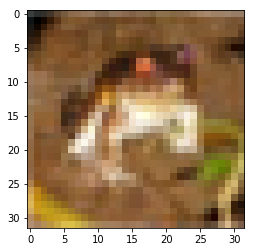

In [5]:
plt.imshow(x_train[0])

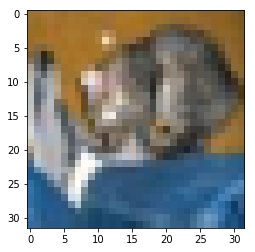

In [6]:
plt.imshow(x_test[0])

In [7]:
batch_size = 128
num_classes = 10
epochs = 35
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [8]:
# # Convert class vectors to binary class matrices.
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [9]:
'''model'''
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=x_train[0].shape))
# model.add(Conv2D(64, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [10]:
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [11]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        73792     
__________

In [12]:
# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.

In [13]:
import numpy as np

In [14]:
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
    """
    # TODO: Implement Function
    # HINT: google "np.eye" or use label encoder from sklearn
#     print(x)
#     print(np.eye(10)[x])
    return np.eye(10)[x]

In [15]:
# (x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [16]:
y_train01 = y_train.reshape(1, -1)
y_train01 = one_hot_encode(y_train01)

y_test01 = y_test.reshape(1, -1)
y_test01 = one_hot_encode(y_test01)

In [17]:
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

Using real-time data augmentation.


In [18]:
# Use ModelCheckpoint to save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, verbose=1)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# earlystop
earlystop = EarlyStopping(monitor='val_loss', patience=3)

In [20]:
# model_history = model.fit(x_train, y_train01[0], \
#                           batch_size=batch_size, \
#                           epochs=epochs, \
# #                           shuffle=True, \
#                           validation_data=(x_test, y_test01[0]),\
#                           callbacks=[checkpoint, earlystop])

In [21]:
model_history = model.fit_generator(datagen.flow(x_train, y_train01[0], batch_size=batch_size), \
                          epochs=epochs, \
#                           shuffle=True, \
                          validation_data=(x_test, y_test01[0]),\
                          workers=4,\
                          callbacks=[checkpoint, earlystop])

Epoch 1/35
391/391 [==============================] - 19s 49ms/step - loss: 1.7710 - acc: 0.3473 - val_loss: 1.3747 - val_acc: 0.4980

Epoch 00001: val_loss improved from inf to 1.37471, saving model to /home/jovyan/pyDL/tensoflow/HW6_kerasCNN/saved_models/keras_cifar10_trained_model.h5
Epoch 2/35
391/391 [==============================] - 17s 44ms/step - loss: 1.4080 - acc: 0.4906 - val_loss: 1.2351 - val_acc: 0.5593

Epoch 00002: val_loss improved from 1.37471 to 1.23510, saving model to /home/jovyan/pyDL/tensoflow/HW6_kerasCNN/saved_models/keras_cifar10_trained_model.h5
Epoch 3/35
391/391 [==============================] - 17s 43ms/step - loss: 1.2544 - acc: 0.5501 - val_loss: 1.0974 - val_acc: 0.6081

Epoch 00003: val_loss improved from 1.23510 to 1.09744, saving model to /home/jovyan/pyDL/tensoflow/HW6_kerasCNN/saved_models/keras_cifar10_trained_model.h5
Epoch 4/35
391/391 [==============================] - 17s 44ms/step - loss: 1.1581 - acc: 0.5893 - val_loss: 0.9858 - val_acc: 0

In [30]:
# # Fit the model on the batches generated by datagen.flow().
# model_history = model.fit_generator(datagen.flow(x_train, y_train01[0],
#                                  batch_size=batch_size),
#                     epochs=epochs,
#                     validation_data=(x_test, y_test01[0]),
#                     workers=4,
#                     callbacks=[earlystop])

# # loading our save model
# print("Loading trained model")
# model = load_model(model_path)

# # Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', scores[0])
# print('Test accuracy:', scores[1])

ValueError: `steps_per_epoch=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps_per_epoch` or use the `keras.utils.Sequence` class.

In [23]:
# '''saveing model'''
# from tensorflow.keras.models import load_model
# # save_model_name = 'cifar10.h5'
# model.save(model_name)
# # del model

In [24]:
# watch nvidia-smi

In [23]:
# loading our save model
print("Loading trained model")
model = load_model("./saved_models/{}".format(model_name))

'''prediction'''
y_pred = model.predict_classes(x_test, batch_size, verbose=0)

# Score trained model.
# scores = model.evaluate(x_test, y_test, verbose=1)
# print('Test loss:', y_pred[0])
# print('Test accuracy:', y_pred[1])

Loading trained model


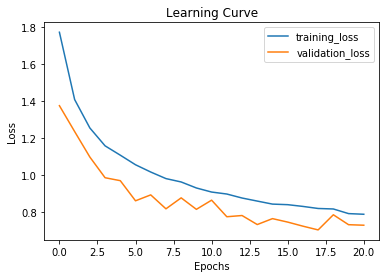

In [24]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [26]:
# for i in model_history.history.keys():
#     print(i)